In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
#podstawowe parametry
female = df.loc[df['Gender'] == "Female"]
male = df.loc[df['Gender'] == "Male"]
att_yes = df.loc[df['Attrition'] == "Yes"]
att_no = df.loc[df['Attrition'] == "No"]

In [6]:
#przedialy wiekowe
powyzej18 = df.loc[df['Age'] >= 18]
ponizej26 = df.loc[df['Age'] <= 26]
powyzej27 = df.loc[df['Age'] >= 27]
ponizej35 = df.loc[df['Age'] <= 35]
powyzej36 = df.loc[df['Age'] >= 36]
ponizej44 = df.loc[df['Age'] <= 44]
powyzej45 = df.loc[df['Age'] >= 45]
ponizej53 = df.loc[df['Age'] <= 53]
powyzej54 = df.loc[df['Age'] >= 54]
ponizej62 = df.loc[df['Age'] <= 62]

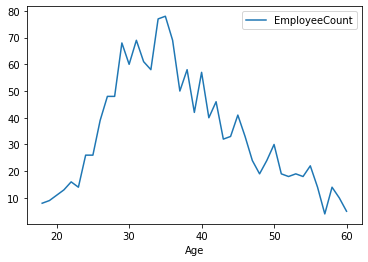

In [7]:
group = df[['Age', 'EmployeeCount']].groupby(by = 'Age').count()
group['Age'] = group.index.get_level_values('Age')

wykres = group.plot("Age", "EmployeeCount")

In [20]:
slider_widget = widgets.FloatSlider(
    value=18,
    min=18,
    max=60,
    step=1,
    description='Podaj wiek: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
slider_widget

FloatSlider(value=18.0, continuous_update=False, description='Podaj wiek: ', max=60.0, min=18.0, readout_forma…

In [21]:
x = int(slider_widget.value)
y = 'Age'

sprawdzana = df.loc[df[y] == x]
suma_spraw = sprawdzana + att_yes
sprawdzenie = suma_spraw['EmployeeCount'].count()

if sprawdzenie == 0:
    if  54 <= x <= 62:
        zmienna = (ponizej62 + powyzej54)
    elif 45 <= x <= 53:
        zmienna = (ponizej53 + powyzej45)
    elif 36 <= x <= 44:
        zmienna = (ponizej53 + powyzej45)
    elif 27 <= x <= 35:
        zmienna = (ponizej53 + powyzej45)
    elif 18 <= x <= 26:
        zmienna = (ponizej53 + powyzej45)
    elif 45 <= x <= 53:
        zmienna = (ponizej53 + powyzej45)
elif sprawdzenie != 0:
    zmienna = df.loc[df[y] == x] 
    
suma_yes = zmienna + att_yes
suma_no = zmienna + att_no
suma_cal = suma_yes['EmployeeCount'].count() + suma_no['EmployeeCount'].count()
p = suma_yes['EmployeeCount'].count() / suma_cal
print("Prawdopodobieństwo odejścia z firmy, przy podanym wieku: {0}, wynosi: {1}.".format(x,p))

Prawdopodobieństwo odejścia z firmy, przy podanym wieku: 18, wynosi: 0.5.


In [11]:
df.groupby(['Attrition', 'Gender'])['EmployeeCount'].count().unstack(fill_value=0)

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [12]:
suma_yes_fem = female + att_yes
suma_no_fem = female + att_no
suma_cal_fem = suma_yes_fem['EmployeeCount'].count() + suma_no_fem['EmployeeCount'].count()
p_fem = suma_yes_fem['EmployeeCount'].count() / suma_cal_fem
print(p_fem)

0.14795918367346939


In [13]:
suma_yes_mal = male + att_yes
suma_no_mal = male + att_no
suma_cal_mal = suma_yes_mal['EmployeeCount'].count() + suma_no_mal['EmployeeCount'].count()
p_mal = suma_yes_mal['EmployeeCount'].count() / suma_cal_mal
print(p_mal)

0.17006802721088435


In [15]:
dropdown_widget = widgets.Dropdown(
    options=[('Female', 'Female'), ('Male', 'Male')],
    value='Male',
    description='Podaj płeć: ',
)
dropdown_widget 


Dropdown(description='Podaj płeć: ', index=1, options=(('Female', 'Female'), ('Male', 'Male')), value='Male')

In [16]:
gender = str(dropdown_widget.value)
if gender.lower() == "male":
    print("Prawdopodobieństwo odejścia z firmy, przy podanej płci: {0}, wynosi: {1}.".format(gender,p_mal))
elif gender.lower() == "female":
    print("Prawdopodobieństwo odejścia z firmy, przy podanej płci: {0}, wynosi: {1}.".format(gender,p_fem))

Prawdopodobieństwo odejścia z firmy, przy podanej płci: Male, wynosi: 0.17006802721088435.
